# 2019/09/22 ver.1.3

## 一、文件内容
特征选择：GBRT+RT+XGboost取平均值 选择前380个特征<br />
单模型构建：<br />
 1：SVR<br />
 2：RF<br />
 3：XGBoost<br />
 4：KNN<br />
 5：GBRT<br />
Stacking：<br />
 XGboost默认
## 二、数据集
### 导入数据集变量<br />
元数据集 训练集全部：dg_train →训练集 特征数据：dg_train<br />
元数据集 测试集全部：dg_test  →测试集 特征数据：dg_test<br />
<br />
训练集 得分数据：score_train<br />
测试集 序号：id_test<br />
训练集 序号：id_train
<br />
### 处理数据集变量<br />
标准化处理后的原训练集 特征数据：dg_scaled_train<br />
标准化处理后的测试集合 特征数据：dg_scaled_test<br />
### 特征选择结果
特征选择后的训练集 特征数据：X<br />
特征选择后的测试集 特征数据：X_predict<br />
### 在X中继续划分数据<br />
X_train：0.8比例的原训练集特征 用作训练和验证<br />
X_test：0.2比例的原训练集特征 用作测试（模型选择）<br />
y_train：0.8比例的原训练集分数 对应X_train<br />
y_test：0.2比例的原训练集分数 对应X_test<br />

## 三、模型信息


变量名|模型名|超参数设置|随机数种子|训练集上预测值
:---------:|:------------------:|:-----------------:|:-----------------:|:-------------------------:
model_svc|支持向量回归||NA|
model_svcRF|随机森林回归||160|
model_xgbr|Xgboost回归||161|
model_k_neighbor|KNN回归||NA|
model_gradient_boosting_regressor|GBRT||162|

## 四、随机数信息
位置|使用函数|随机数种子
:------:|:-------:|:--------:|
特征处理|GBRT|20
特征处理|train_test_split|21
stacking|KFold|22
预测|train_test_split|23


# 1、前処理（preprocess）

In [37]:
#预设导入
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import joblib

import warnings
warnings.filterwarnings("ignore")

In [38]:
#机器学习导入
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn import neighbors
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [3]:
dg_train=pd.read_csv('train.csv')
dg_test=pd.read_csv("test.csv")

#单独提取ID列和score列
id_train=dg_train["ID"].values
id_test=dg_test["ID"].values
score_train=dg_train["Score"].values

del dg_train["ID"]
del dg_train["Score"]
del dg_test["ID"]

In [4]:
#z-score 标准化
scaler=StandardScaler().fit(dg_train)#标准化的mean var
print(scaler)
print(scaler.mean_)
print(scaler.var_)
dg_scaled_train=scaler.transform(dg_train)#标准化结果向量
print(dg_scaled_train)
np.shape(dg_scaled_train)

dg_scaled_test=scaler.transform(dg_test)
print(dg_scaled_test)
np.shape(dg_scaled_test)#相同标准 标准化测试集

StandardScaler(copy=True, with_mean=True, with_std=True)
[5.82623261e-04 4.17374998e+00 7.18538490e-01 ... 1.87939626e+00
 9.97324521e-01 1.03583133e+00]
[7.27939627e-04 7.21597472e-02 1.39518638e-02 ... 2.31160294e+00
 6.76420780e-07 3.08326932e+00]
[[-0.02159435 -0.43089696  0.8928487  ... -0.96316788 -0.39457952
  -0.58990668]
 [-0.02159435 -0.23359638  1.78179021 ...  1.38095879 -0.39457952
   1.11859545]
 [-0.02159435 -0.12936211  0.96904369 ... -0.67771587  2.03718504
  -0.58990668]
 ...
 [-0.02159435  1.25174197  0.83358594 ...  0.55025397  0.82130276
  -0.58990668]
 [-0.02159435  1.17728892 -0.25007609 ... -1.39923858  0.82130276
  -0.58990668]
 [-0.02159435 -0.48301409 -0.45326272 ...  0.18061334 -0.39457952
  -0.58990668]]
[[-0.02159435 -0.42717431 -0.74957655 ...  0.41476292  0.82130276
  -0.58990668]
 [-0.02159435 -1.50674353  0.78278928 ... -0.40936467 -0.39457952
  -0.58990668]
 [-0.02159435  1.90320616  0.7150604  ...  0.67851006  0.82130276
  -0.58990668]
 ...
 [-0.0215

(13732, 3805)

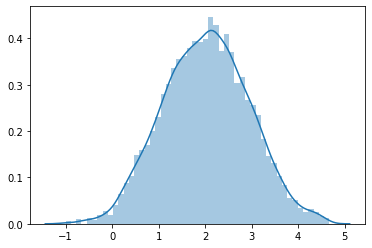

In [13]:
sns.distplot(score_train)

### 以下开始特征选择

In [ ]:
feature_importance = clf_fs.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())


fi_threshold = 18    
important_idx = np.where(feature_importance > fi_threshold)[0]
important_features = features_list[important_idx]


    print("\n", important_features.shape[0], "Important features(>", \
          fi_threshold, "% of max importance)...\n")
            #important_features
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    #get the figure about important features
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], \
            color='r',align='center')
    plt.yticks(pos, important_features[sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
plt.show()

In [5]:
clf_fs_1 = ensemble.GradientBoostingRegressor(random_state=120)
clf_fs_1 =clf_fs_1.fit(dg_scaled_train, score_train)
clf_fs_1.feature_importances_  


array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
clf_fs_2 = RandomForestRegressor(random_state=150)
clf_fs_2 =clf_fs_2.fit(dg_scaled_train, score_train)
clf_fs_2.feature_importances_ 

array([0.00000000e+00, 3.70501781e-06, 3.50042909e-05, ...,
       3.02316896e-04, 1.11858485e-04, 2.12176308e-05])

In [7]:
clf_fs_3 = xgb.XGBRegressor(random_state=151)
clf_fs_3 =clf_fs_3.fit(dg_scaled_train, score_train)
clf_fs_3.feature_importances_  

[07:09:44] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.0000000e+00, 1.7383036e-05, 1.4157470e-03, ..., 7.5347588e-04,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [8]:
feature_importance_1=clf_fs_1.feature_importances_
feature_importance_2=clf_fs_2.feature_importances_
feature_importance_3=clf_fs_3.feature_importances_
feature_importance=np.add(feature_importance_1,feature_importance_2,feature_importance_3)
#feature_importance
index_fs=np.argsort(-feature_importance)
index_fs_select=index_fs[0:380]
X=dg_scaled_train[:,index_fs_select]
X_predict=dg_scaled_test[:,index_fs_select]

In [18]:
print(index_fs_select)

[  87  919 3111 2613  118 2348 2131 3700 3432 3551  328  699 3115 3214
 1360 1335 3371 3465  225  744 1843 2861  192  865 3559 1779 3453 2524
 1814  524   14 3318 1258 1618 1689 2418 2631  373 3652 2009 1352  381
 2217 1989 2936 3113 1079  607  984 3722 3712 3581 1732 2616 1049  549
 2980  720 3289 1473 1978  765  933 3441 3345  418 1412 3129 3262    5
  595 2724 1365 1929 3063 1724 3057 2885 3050 3210 2715 2989 1744 3199
 1192 2864 3708  875  476  471 3255 3197 1133 2894  119 1795 1262 1189
 3650 1314 3759 1197 2377  141  544 1010 3301 2130  670 3733 3174  901
 1173 1434 1343  743 2665 2362 3089   57 2267 1973 3070 1384 2988 3659
 3761  267 1894 3193 3018 2186  780 2901 2510 2798 1521 2843 2290  776
 3238  486  945  280 1161 1065 3669  295 2545 3793 1211 1601 3641  653
 3120  256  936  110 3698 2218  442 1948   92 3634  113 2913 2857 2796
  529 1872 1930 2833  259 3644 2661 1410 3530 1878 1675   45 3242 3747
 1185 1319  458  419 2831  448 3208 3112 2536 2726 1660 1988  217  967
 1221 

In [25]:
dg_train.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col3796,col3797,col3798,col3799,col3800,col3801,col3802,col3803,col3804,col3805
count,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,...,13731.000000,13731.000000,1.373100e+04,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000
mean,0.000583,4.173750,0.718538,7.142816,12.532379,0.603704,4.345228,0.052560,13.284903,37.756111,...,1.215428,0.106329,2.184837e-07,0.115421,25.719365,19.682047,0.014347,1.879396,0.997325,1.035831
std,0.026981,0.268635,0.118122,26.261926,9.907825,0.169981,0.281740,0.136567,4.676945,7.725197,...,0.443918,0.320774,1.478012e-05,0.033461,28.326643,9.833533,0.118921,1.520451,0.000822,1.755988
min,0.000000,2.955000,0.386000,0.000000,0.000000,0.106000,3.457000,-0.399000,1.000000,11.672000,...,0.045000,0.000000,0.000000e+00,0.049000,0.000000,4.039000,0.000000,-2.055000,0.991000,0.000000
25%,0.000000,3.994500,0.628000,0.000000,4.821500,0.463000,4.101000,-0.048000,10.000000,32.580000,...,0.910000,0.000000,0.000000e+00,0.093000,1.798500,12.817500,0.000000,0.797000,0.997000,0.000000
50%,0.000000,4.184000,0.725000,0.000000,10.626000,0.606000,4.344000,0.037000,13.000000,37.688000,...,1.181000,0.000000,0.000000e+00,0.109000,18.147000,17.383000,0.000000,1.651000,0.997000,0.000000
75%,0.000000,4.374000,0.809000,4.000000,18.507500,0.741000,4.582000,0.143000,16.000000,42.860500,...,1.476000,0.000000,0.000000e+00,0.130000,39.595500,24.082000,0.000000,2.763500,0.998000,2.000000
max,2.000000,4.893000,0.958000,525.000000,72.823000,0.949000,5.099000,0.561000,32.000000,65.224000,...,3.785000,2.000000,1.000000e-03,0.505000,254.304000,70.825000,1.000000,11.219000,0.999000,13.000000


In [40]:
pd.DataFrame(dg_scaled_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,3795,3796,3797,3798,3799,3800,3801,3802,3803,3804
count,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,...,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04,1.373100e+04
mean,1.034947e-18,1.029772e-15,-4.398524e-16,-1.448926e-17,-1.557595e-16,-6.571912e-17,3.100701e-15,-1.630041e-17,-2.639114e-17,2.587367e-17,...,-1.529781e-16,1.552420e-17,-8.020838e-18,7.865596e-17,-3.104840e-18,2.654639e-16,-6.209681e-18,9.107532e-17,1.531535e-13,-5.278229e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-2.159435e-02,-4.536983e+00,-2.815307e+00,-2.719936e-01,-1.264943e+00,-2.928107e+00,-3.152769e+00,-3.306627e+00,-2.626790e+00,-3.376621e+00,...,-2.636680e+00,-3.314878e-01,-1.478281e-02,-1.985082e+00,-9.079898e-01,-1.590844e+00,-1.206480e-01,-2.587745e+00,-7.689873e+00,-5.899067e-01
25%,-2.159435e-02,-6.672854e-01,-7.665088e-01,-2.719936e-01,-7.782899e-01,-8.277924e-01,-8.668872e-01,-7.363688e-01,-7.023864e-01,-6.700540e-01,...,-6.880530e-01,-3.314878e-01,-1.478281e-02,-6.700883e-01,-8.444960e-01,-6.981007e-01,-1.206480e-01,-7.119175e-01,-3.945795e-01,-5.899067e-01
50%,-2.159435e-02,3.815726e-02,5.470386e-02,-2.719936e-01,-1.924185e-01,1.350988e-02,-4.357328e-03,-1.139417e-01,-6.091865e-02,-8.817025e-03,...,-7.755828e-02,-3.314878e-01,-1.478281e-02,-1.919087e-01,-2.673328e-01,-2.338051e-01,-1.206480e-01,-1.502216e-01,-3.945795e-01,-5.899067e-01
75%,-2.159435e-02,7.454612e-01,7.658571e-01,-1.196763e-01,6.030928e-01,8.077463e-01,8.404250e-01,6.622616e-01,5.805491e-01,6.607696e-01,...,5.870023e-01,-3.314878e-01,-1.478281e-02,4.357020e-01,4.898794e-01,4.474601e-01,-1.206480e-01,5.814958e-01,8.213028e-01,5.490947e-01
max,7.410641e+01,2.677518e+00,2.027307e+00,1.971965e+01,6.085374e+00,2.031459e+00,2.675519e+00,3.723139e+00,4.001710e+00,3.555753e+00,...,5.788597e+00,5.903662e+00,6.764614e+01,1.164304e+01,8.069892e+00,5.201062e+00,8.288577e+00,6.142877e+00,2.037185e+00,6.813603e+00


In [32]:
dg_train["col2614"].describe()

count    13731.000000
mean        34.812465
std         34.459633
min          0.010000
25%          1.900000
50%         24.000000
75%         63.000000
max        230.000000
Name: col2614, dtype: float64

In [119]:
i=0
for f_ind in feature_importance[index_fs]:
    i+=1
    if(f_ind!=0):
        print(i)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112


In [ ]:
#基模型的特征选择
clf_fs = ensemble.GradientBoostingRegressor(random_state=20)
clf_fs =clf_fs.fit(dg_scaled_train, score_train)
clf_fs.feature_importances_  

model_fs = SelectFromModel(clf_fs, prefit=True)
X = model_fs.transform(dg_scaled_train)


#SelectFromModel(ensemble.GradientBoostingRegressor()).fit_transform(dg_scaled_train, score_train)

In [ ]:
X_predict=model_fs.transform(dg_scaled_test)
print(dg_scaled_test)
np.shape(X_predict)

In [79]:
X

array([[ 0.73126432, -0.34315163,  2.96723984, ..., -0.91859817,
         0.34010331, -0.33148782],
       [ 1.78436303, -0.34315163,  0.2107044 , ..., -0.26914594,
         0.64388838, -0.33148782],
       [ 0.76068048, -0.34315163, -1.46411367, ...,  2.56679545,
        -1.03016126, -0.33148782],
       ...,
       [ 0.49593499, -0.34315163, -0.63438729, ...,  0.27206425,
         0.5469357 ,  2.78608699],
       [-0.62776252,  2.18560956, -1.08305415, ..., -0.55057524,
         0.19790605, -0.33148782],
       [-0.23946914, -0.34315163,  0.33669989, ..., -1.04848862,
        -0.24161278, -0.33148782]])

In [140]:
X

array([[-0.51124829,  0.87139512, -1.16342225, ...,  0.39072476,
        -0.15234158, -0.71373671],
       [-0.44935252,  1.80973467,  1.73707351, ..., -0.86456136,
        -1.00349245,  0.22295745],
       [-0.78634061,  0.54021645,  0.68127279, ..., -0.14725501,
        -1.62339108,  1.47188301],
       ...,
       [-0.53875752, -0.01174799,  0.3028738 , ...,  0.23701625,
         1.90329051,  0.22295745],
       [ 0.8504587 , -1.36406087,  2.43136807, ...,  0.85185027,
         3.66552767,  0.22295745],
       [-0.24303328, -0.17733732, -1.20903284, ...,  1.28735769,
        -1.23881962, -0.71373671]])

In [9]:
np.shape(X)

(13731, 380)

In [10]:
#划分数据集

X_train, X_test, y_train, y_test = train_test_split(X, score_train, test_size=0.2, random_state=21)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10984, 380), (10984,), (2747, 380), (2747,))

# 2、学習（train）

### SVR

In [143]:
#SVR模型实现
model_svc=svm.SVR()
model_svc.fit(X_train,y_train)

print(model_svc.score(X_test,y_test))

y_pred = model_svc.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

0.5897356830942392
0.5897356830942392


GBDT 0.5903171534507402<br>
RF 0.5714306438983159<br >
XBG 0.5864080375808052<br>
平均500 0.5877608712908593<br>
平均400 0.5889615497881555<br>
358 0.5888839063663873<br>
370 0.5889239406579279<br>
375 0.589024306528543<br>
380 0.5897356830942392<br>


In [144]:
#SVR模型调参数：C gamma
param_g=[{"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-4, 0, 5)}]
scores_g=['r2']
for score in scores_g:
    print(score)
    clf=GridSearchCV(svm.SVR(),param_grid=param_g,cv=3,scoring=score)
    clf.fit(X_train,y_train)
    
    print(clf.best_estimator_)
    
    means = clf.cv_results_['mean_test_score']
    stds=clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    
    for (param,mean_score,std_score) in zip(params,means,stds):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score,std_score,param))

r2
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.379(+/-0.007) for {'C': 1.0, 'gamma': 0.0001}
0.502(+/-0.009) for {'C': 1.0, 'gamma': 0.001}
0.493(+/-0.006) for {'C': 1.0, 'gamma': 0.01}
0.035(+/-0.001) for {'C': 1.0, 'gamma': 0.1}
0.010(+/-0.001) for {'C': 1.0, 'gamma': 1.0}
0.441(+/-0.010) for {'C': 10.0, 'gamma': 0.0001}
0.537(+/-0.010) for {'C': 10.0, 'gamma': 0.001}
0.502(+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.040(+/-0.002) for {'C': 10.0, 'gamma': 0.1}
0.011(+/-0.001) for {'C': 10.0, 'gamma': 1.0}
0.492(+/-0.010) for {'C': 100.0, 'gamma': 0.0001}
0.479(+/-0.011) for {'C': 100.0, 'gamma': 0.001}
0.503(+/-0.008) for {'C': 100.0, 'gamma': 0.01}
0.040(+/-0.002) for {'C': 100.0, 'gamma': 0.1}
0.010(+/-0.002) for {'C': 100.0, 'gamma': 1.0}
0.496(+/-0.005) for {'C': 1000.0, 'gamma': 0.0001}
0.456(+/-0.012) for {'C': 1000.0, 'gamma': 0.001}
0.499(+/-0.016) for {'C': 1000.0, 'gamma

In [145]:
#SVR模型实现
model_svc_t=clf.best_estimator_
model_svc_t.fit(X_train,y_train)

print(model_svc_t.score(X_test,y_test))

y_pred = model_svc_t.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

model_svc=clf.best_estimator_

0.5940389333631619
0.5940389333631619


### RF

In [146]:
model_svcRF=RandomForestRegressor(random_state=160)
model_svcRF.fit(X_train,y_train)

print(model_svcRF.score(X_test,y_test))#0.4697676007383277

y_pred = model_svcRF.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

0.4808578016857748
0.4808578016857748


380 0.4808578016857748

In [147]:
N_estimators=[{"n_estimators":[20,50,100,150,200,300,400,500]}]
scores_g=['r2']
for score in scores_g:
    print(score)
    clf=GridSearchCV(RandomForestRegressor(random_state=160),param_grid=N_estimators,cv=3,scoring=score)
    clf.fit(X_train,y_train)
    
    print(clf.best_estimator_)
    
    means = clf.cv_results_['mean_test_score']
    stds=clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    
    for (param,mean_score,std_score) in zip(params,means,stds):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score,std_score,param))

r2
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=160, verbose=0,
                      warm_start=False)
0.475(+/-0.014) for {'n_estimators': 20}
0.498(+/-0.012) for {'n_estimators': 50}
0.505(+/-0.012) for {'n_estimators': 100}
0.507(+/-0.013) for {'n_estimators': 150}
0.508(+/-0.013) for {'n_estimators': 200}
0.509(+/-0.013) for {'n_estimators': 300}
0.510(+/-0.012) for {'n_estimators': 400}
0.510(+/-0.012) for {'n_estimators': 500}


In [148]:
model_svcRF_t=clf.best_estimator_
model_svcRF_t.fit(X_train,y_train)

print(model_svcRF_t.score(X_test,y_test))#默认0.4697676007383277

y_pred = model_svcRF_t.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))
model_svcRF=clf.best_estimator_

0.5451068944441522
0.5451068944441522


### xgb

In [149]:
model_xgbr = xgb.XGBRegressor(random_state=161)
model_xgbr.fit(X_train, y_train)

print(model_xgbr.score(X_test,y_test))

y_pred = model_xgbr.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

[02:15:34] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4852452621853672
0.4852452621853672


GBDT 0.48840397626857135<br>
RF 0.47431755406122006<br />
XGB 0.4886366445001801<br>
平均500 0.4851985990179926<br>
平均400 0.4858654940215366<br>
358 0.4859184552814983<br>
370 0.48736871205486315<br>
375 0.4852452621853672<br>
380 0.4852452621853672<br>

In [150]:
#调参 XGboost——n_estimators 其他默认
cv_params = [{"n_estimators":[20,50,100,150,200,300,400,500]}]

scores_GBM=['r2']

for score in scores_GBM:
    print(score)
    model = XGBRegressor(random_state=161)
    optimized_GBM=GridSearchCV(estimator=model, param_grid=cv_params, scoring=score, cv=3, verbose=1, n_jobs=-1)
    optimized_GBM.fit(X_train,y_train)
    
    print(optimized_GBM.best_estimator_)
    
    means_GBM = optimized_GBM.cv_results_['mean_test_score']
    stds_GBM=optimized_GBM.cv_results_['std_test_score']
    params_GBM = optimized_GBM.cv_results_['params']
    
    for (param_GBM,mean_score_GBM,std_score_GBM) in zip(params_GBM,means_GBM,stds_GBM):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score_GBM,std_score_GBM,param_GBM))

r2
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.0min finished


[02:19:48] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=161,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
0.297(+/-0.011) for {'n_estimators': 20}
0.423(+/-0.011) for {'n_estimators': 50}
0.471(+/-0.010) for {'n_estimators': 100}
0.496(+/-0.010) for {'n_estimators': 150}
0.508(+/-0.011) for {'n_estimators': 200}
0.523(+/-0.009) for {'n_estimators': 300}
0.533(+/-0.009) for {'n_estimators': 400}
0.538(+/-0.008) for {'n_estimators': 500}


In [151]:
#调参 XGboost——maxdepth minchildweight 其他默认
cv_params = [{'max_depth': [3, 5,7,9], 'min_child_weight': [1, 3, 5]}]

scores_GBM_mami=['r2']

for score in scores_GBM_mami:
    print(score)
    model = optimized_GBM.best_estimator_
    optimized_GBM_mami=GridSearchCV(estimator=model, param_grid=cv_params, scoring=score, cv=3, verbose=1, n_jobs=-1)
    optimized_GBM_mami.fit(X_train,y_train)
    
    print(optimized_GBM_mami.best_estimator_)
    
    means_GBM_mami = optimized_GBM_mami.cv_results_['mean_test_score']
    stds_GBM_mami=optimized_GBM_mami.cv_results_['std_test_score']
    params_GBM_mami = optimized_GBM_mami.cv_results_['params']
    
    for (param_GBM_mami,mean_score_GBM_mami,std_score_GBM_mami) in zip(params_GBM_mami,means_GBM_mami,stds_GBM_mami):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score_GBM_mami,std_score_GBM_mami,param_GBM_mami))

r2
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 24.6min finished


[02:45:24] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=161,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
0.538(+/-0.008) for {'max_depth': 3, 'min_child_weight': 1}
0.537(+/-0.009) for {'max_depth': 3, 'min_child_weight': 3}
0.537(+/-0.008) for {'max_depth': 3, 'min_child_weight': 5}
0.557(+/-0.009) for {'max_depth': 5, 'min_child_weight': 1}
0.555(+/-0.010) for {'max_depth': 5, 'min_child_weight': 3}
0.556(+/-0.011) for {'max_depth': 5, 'min_child_weight': 5}
0.561(

In [152]:
#调参 XGboost——学习率
cv_params = [{'learning_rate':  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}]

scores_GBM_lr=['r2']

for score in scores_GBM_lr:
    print(score)
    model = optimized_GBM_mami.best_estimator_
    optimized_GBM_lr=GridSearchCV(estimator=model, param_grid=cv_params, scoring=score, cv=3, verbose=1, n_jobs=-1)
    optimized_GBM_lr.fit(X_train,y_train)
    
    print(optimized_GBM_lr.best_estimator_)
    
    means_GBM_lr = optimized_GBM_lr.cv_results_['mean_test_score']
    stds_GBM_lr=optimized_GBM_lr.cv_results_['std_test_score']
    params_GBM_lr = optimized_GBM_lr.cv_results_['params']
    
    for (param_GBM_lr,mean_score_GBM_lr,std_score_GBM_lr) in zip(params_GBM_lr,means_GBM_lr,stds_GBM_lr):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score_GBM_lr,std_score_GBM_lr,param_GBM_lr))

r2
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 15.3min finished


[03:03:25] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=161,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
-2.447(+/-0.012) for {'learning_rate': 0.0001}
-0.765(+/-0.010) for {'learning_rate': 0.001}
0.530(+/-0.012) for {'learning_rate': 0.01}
0.561(+/-0.009) for {'learning_rate': 0.1}
0.538(+/-0.010) for {'learning_rate': 0.2}
0.504(+/-0.009) for {'learning_rate': 0.3}


In [153]:
model_xgbr_t = optimized_GBM.best_estimator_
model_xgbr_t.fit(X_train, y_train)

print(model_xgbr_t.score(X_test,y_test))

y_pred = model_xgbr_t.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))
model_xgbr = optimized_GBM.best_estimator_

[03:06:11] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5650615677014149
0.5650615677014149


### KNN

In [154]:
# 4.kNN回归
model_k_neighbor = neighbors.KNeighborsRegressor()
model_k_neighbor.fit(X_train, y_train)

print(model_k_neighbor.score(X_test,y_test))

y_pred = model_k_neighbor.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

0.46687902869520853
0.46687902869520853


In [11]:
param_grids=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }]
scores_KNN=['r2']

for score in scores_KNN:
    print(score)
    model = neighbors.KNeighborsRegressor()
    clf_k=GridSearchCV(estimator=model, param_grid=param_grids, scoring=score, cv=3, verbose=1, n_jobs=-1)
    clf_k.fit(X_train,y_train)
    
    print(clf_k.best_estimator_)
    
    means_KNN = clf_k.cv_results_['mean_test_score']
    stds_KNN=clf_k.cv_results_['std_test_score']
    params_KNN = clf_k.cv_results_['params']
    
    for (param_KNN,mean_score_KNN,std_score_KNN) in zip(params_KNN,means_KNN,stds_KNN):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score_KNN,std_score_KNN,param_KNN))

r2
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
model_k_neighbor_t = clf_k.best_estimator_
model_k_neighbor_t.fit(X_train, y_train)

print(model_k_neighbor_t.score(X_test,y_test))

y_pred = model_k_neighbor_t.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

model_k_neighbor = clf_k.best_estimator_

### GBRT

In [ ]:
model_gradient_boosting_regressor = ensemble.GradientBoostingRegressor(random_state=162)  

model_gradient_boosting_regressor.fit(X_train, y_train)

print(model_gradient_boosting_regressor.score(X_test,y_test))

y_pred = model_gradient_boosting_regressor.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

In [ ]:
N_estimators=[{"n_estimators":[20,50,100,150,200,300,400,500]}]
scores_g=['r2']
for score in scores_g:
    print(score)
    clf_gb=GridSearchCV(ensemble.GradientBoostingRegressor(random_state=162),param_grid=N_estimators,cv=3,scoring=score)
    clf_gb.fit(X_train,y_train)
    
    print(clf_gb.best_estimator_)
    
    means = clf_gb.cv_results_['mean_test_score']
    stds=clf_gb.cv_results_['std_test_score']
    params = clf_gb.cv_results_['params']
    
    for (param,mean_score,std_score) in zip(params,means,stds):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score,std_score,param))

In [ ]:
model_gradient_boosting_regressor_t = clf_gb.best_estimator_

model_gradient_boosting_regressor_t.fit(X_train, y_train)

print(model_gradient_boosting_regressor_t.score(X_test,y_test))

y_pred = model_gradient_boosting_regressor_t.predict(X_test)
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))

model_gradient_boosting_regressor = clf_gb.best_estimator_

# 第二阶段stacking

In [12]:
# '''创建训练的数据集'''
#data, target = make_blobs(n_samples=50000, centers=2, random_state=0, cluster_std=0.60)
 
# '''模型融合中使用到的各个单模型'''
clfs = [svm.SVR(kernel='rbf',C=10,gamma=0.001),
        RandomForestRegressor(n_estimators=400),
        xgb.XGBRegressor(max_depth=7,min_child_weight=5,n_estimators=500,random_state=161),
        neighbors.KNeighborsRegressor(n_neighbors=6, p=1,weights='distance'),
        ensemble.GradientBoostingRegressor(n_estimators=500)
       ]
 
#'''切分一部分数据作为测试集'''
X=X#训练集 数据
X_predict=X_predict#测试集 数据
y=score_train#训练集 分数
#y_predict = 


dataset_blend_train = np.zeros((X.shape[0], len(clfs)))#第一轮 保存各个模型在训练集上的预测结果 训练集合个数×模型数
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))#第一轮 保存各个模型在测试集上的预测结果 训练集合个数×模型数

#'''5折stacking'''
n_folds = 5
kf = KFold(n_folds,True,22)
skf=list(kf.split(X))#X或者y

for j, clf in enumerate(clfs):
    #'''依次训练各个单模型'''
    print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))#存目前这个模型上的测试集结果(之后求平均)
    for i, (train, test) in enumerate(skf):
        #'''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict(X_test)#1fold的预测结果
        y_submission=y_submission.flatten()#2维数组转1维 KNN需要 
        #y_submission.reshape(len(y_submission),1)#一维数组转二维 可以不加
        
        dataset_blend_train[test, j] = y_submission#在模型顺序对应的j位置 存1fold的预测结果
        dataset_blend_test_j[:, i] = clf.predict(X_predict).flatten()#存该模型该折下的测试集预测结果
        
    #'''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)#测试集结果按行取平均后储存
    
    
    #print("val auc Score: %f" % r2_score(y_predict, dataset_blend_test[:, j]))
    

0 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
1 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
2 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=5, missing=None, n_estimators=500,
             n_jobs=1, nthread=N

In [13]:
#导出数据集到本地
submission_train_1=pd.DataFrame(dataset_blend_train)
#submission_train_1.head()
submission_train_1.to_csv('dataset_blend_train.csv',index=False)#第一轮训练后 train集合预测得到的score集合 训练集样本数x3个模型

submission_test_1=pd.DataFrame(dataset_blend_test)
#submission_test_1.head()
submission_test_1.to_csv('dataset_blend_test.csv',index=False)#第一轮训练后 test集合预测得到的score集合 测试机样本数x3个模型

# 3、予測（predict）

In [16]:
#第二轮 
#model_stacking_xgb = xgb.XGBRegressor(random_state=200)
model_stacking_svm=svm.SVR()
model_stacking_svm.fit(dataset_blend_train, y)
y_submission = model_stacking_svm.predict(dataset_blend_test)

#生成文件
submission_df=pd.DataFrame(data={'Id':id_test,'SalePrice':y_submission})
submission_df.head()
submission_df.to_csv('baseline_st3_svg.csv',header=False,index=False)

In [ ]:
#调参数
X_train, X_test, y_train, y_test = train_test_split(dataset_blend_train, y, test_size=0.2, random_state=123)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

#SVR模型调参数：C gamma
param_g=[{"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-4, 0, 5)}]
scores_g=['r2']
for score in scores_g:
    print(score)
    clf_st=GridSearchCV(svm.SVR(),param_grid=param_g,cv=3,scoring=score)
    clf_st.fit(X_train,y_train)
    
    print(clf_st.best_estimator_)
    
    means = clf_st.cv_results_['mean_test_score']
    stds=clf_st.cv_results_['std_test_score']
    params = clf_st.cv_results_['params']
    
    for (param,mean_score,std_score) in zip(params,means,stds):
        print("%0.3f(+/-%0.03f) for %r"%(mean_score,std_score,param))

In [17]:
#肯定不准确的预测score
X_train, X_test, y_train, y_test = train_test_split(dataset_blend_train, y, test_size=0.2, random_state=156)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

model_stacking_svm.fit(X_train, y_train)

print(model_stacking_svm.score(X_test,y_test))

(10984, 5) (10984,) (2747, 5) (2747,)
0.6225271454983285


In [ ]:
clf_st_best = clf_st.best_estimator_

clf_st_best.fit(dataset_blend_train, y)
y_submission = clf_st_best.predict(dataset_blend_test)

#生成文件
submission_df=pd.DataFrame(data={'Id':id_test,'SalePrice':y_submission})
submission_df.head()
submission_df.to_csv('baseline_st3_2.csv',header=False,index=False)